In [ ]:
!apt install ffmpeg
!brew install imagemagick

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML, Image # For GIF

rc('animation', html='html5')
np.random.seed(5)



import seaborn as sns; sns.set()

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)


Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-c

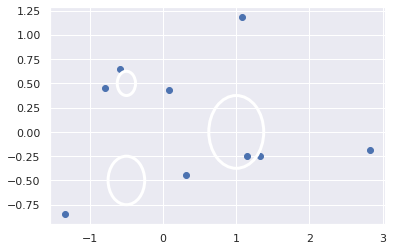

In [ ]:
points = np.vstack(((np.random.randn(5, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(2, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(2, 2) * 0.5 + np.array([-0.5, -0.5]))))

####
plt.scatter(points[:, 0], points[:, 1])
ax = plt.gca()
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=3))

In [ ]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

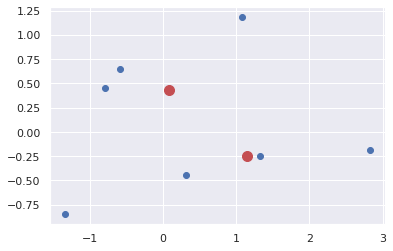

In [ ]:
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 2)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

In [ ]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    p=2
    distances=np.power(((points - centroids[:, np.newaxis])**p).sum(axis=2),1/p)
    
    # distances construye la matriz de la distancia de cada centroide con todos los puntos de esta forma l aprimera linea es la distacia de del primer centroide con el resto de los puntos en su orden
    return np.argmin(distances, axis=0)
    # cuando retorna reorn al posisción del minimo en cada columna

In [ ]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

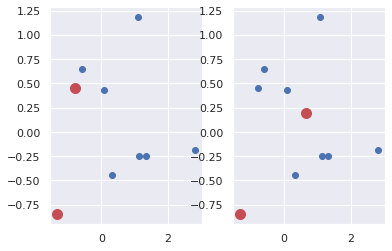

In [ ]:
plt.subplot(121)
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 2)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

plt.subplot(122)
plt.scatter(points[:, 0], points[:, 1])
closest = closest_centroid(points, centroids)
centroids = move_centroids(points, closest, centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/animation.py", line 951, in _start
    self._init_draw()
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/animation.py", line 1749, in _init_draw
    raise RuntimeError('The init_func must return a '
RuntimeError: The init_func must return a sequence of Artist objects.


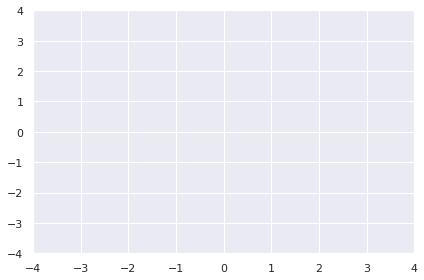

IndexError: ignored

In [ ]:


# create a simple animation
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
centroids = initialize_centroids(points, 3)

def init():
    return

def animate(i):
    global centroids
    closest = closest_centroid(points, centroids)
    centroids = move_centroids(points, closest, centroids)
    ax.cla()
    ax.scatter(points[:, 0], points[:, 1], c=closest)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
    return 

anim =animation.FuncAnimation(fig, animate, init_func=init,frames=10, interval=20, repeat=True, blit=True)





## Create the animation object
#anim = animation.FuncAnimation(fig, updateLines, N+1, fargs=(data, lines), interval=30, repeat=True, blit=False)

plt.tight_layout()
plt.show()

# Save as GIF
anim.save('animationBrownianMotion2d.gif', writer='pillow', fps=60)

Image(url='animationBrownianMotion2d.gif')
## Uncomment to save the animation
#anim.save('brownian2d_1path.mp4', writer=writer)


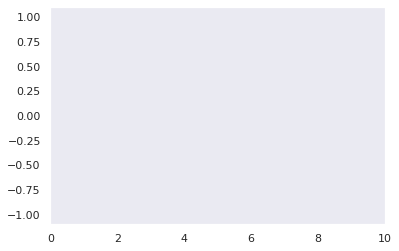

In [ ]:
import itertools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def data_gen():
    for cnt in itertools.count():
        t = cnt / 10
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, interval=10, init_func=init)
plt.show()

In [ ]:
%matplotlib inline

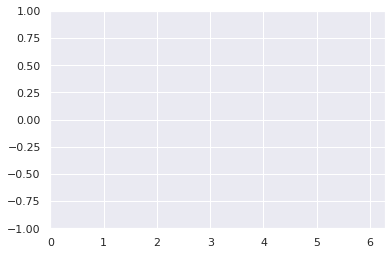

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()